In [5]:
import pandas as pd
# Load the dataset
df = pd.read_csv('C:/Users/User/OneDrive/Desktop/python 1/Lab6/iris.csv')
# Display the first few rows
print(df.head())
# Dimensions of the dataset
print("Dataset Dimensions:", df.shape)
# Peek at the data
print(df.head())
# Statistical summary
print(df.describe())
# Class distribution
print(df['variety'].value_counts())



   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
Dataset Dimensions: (150, 5)
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066    

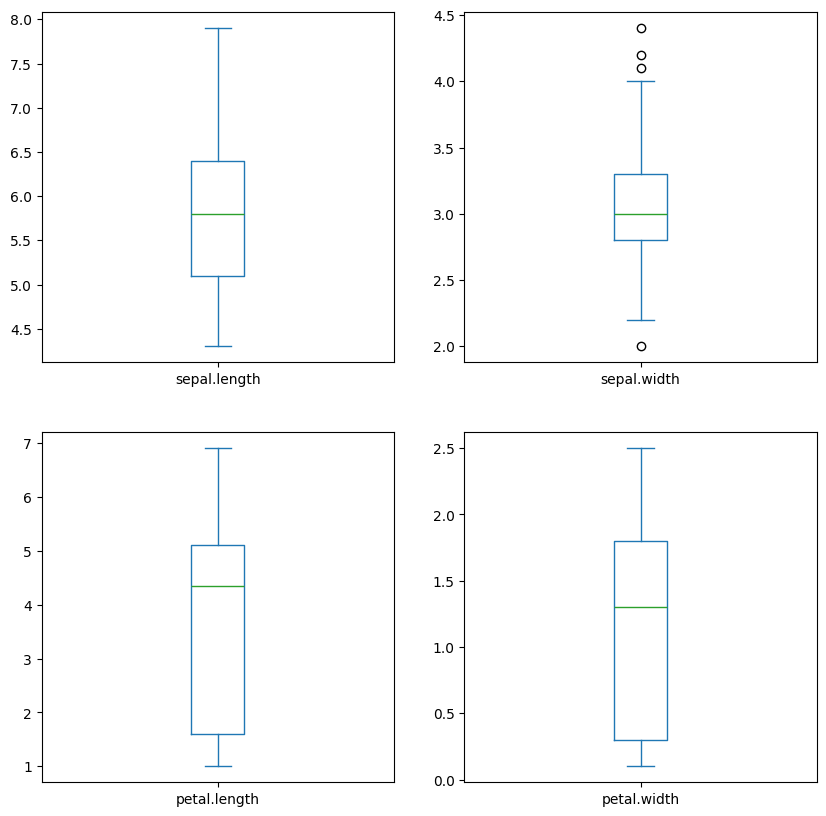

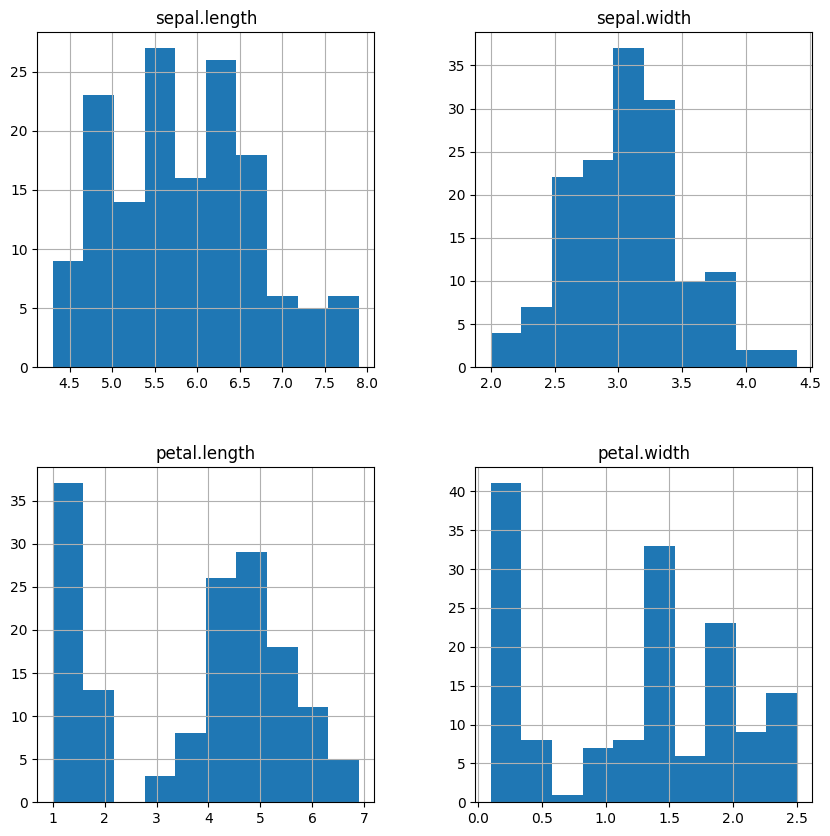

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for each feature
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10, 10))
plt.show()


# Histogram for each feature
df.hist(figsize=(10, 10))
plt.show()



In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('variety', axis=1)
y = df['variety']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Set up 10-fold cross-validation
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Define the models to test
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model
results = []
model_names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.9499999999999998 (0.055277079839256664)
LDA: 0.9666666666666666 (0.04082482904638632)
KNN: 0.9499999999999998 (0.04082482904638632)
CART: 0.9333333333333332 (0.05)
NB: 0.9416666666666667 (0.06508541396588878)
SVM: 0.9583333333333333 (0.04166666666666669)


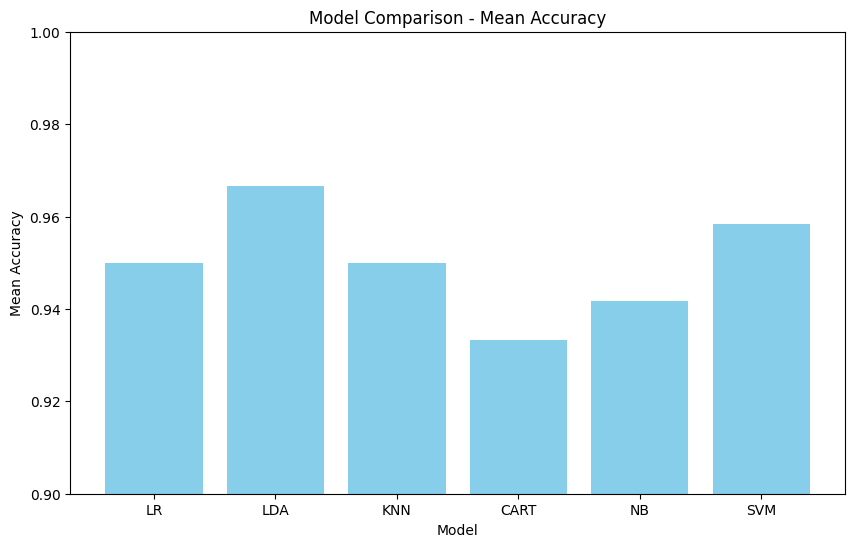

In [9]:
# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame({'Model': model_names, 'Mean Accuracy': [result.mean() for result in results]})

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Mean Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.title('Model Comparison - Mean Accuracy')
plt.ylim(0.9, 1.0)  # Adjusting y-axis to focus on the differences
plt.show()

In [10]:
# Select the best model based on previous results (e.g., SVM)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = SVC()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Evaluate the predictions
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
